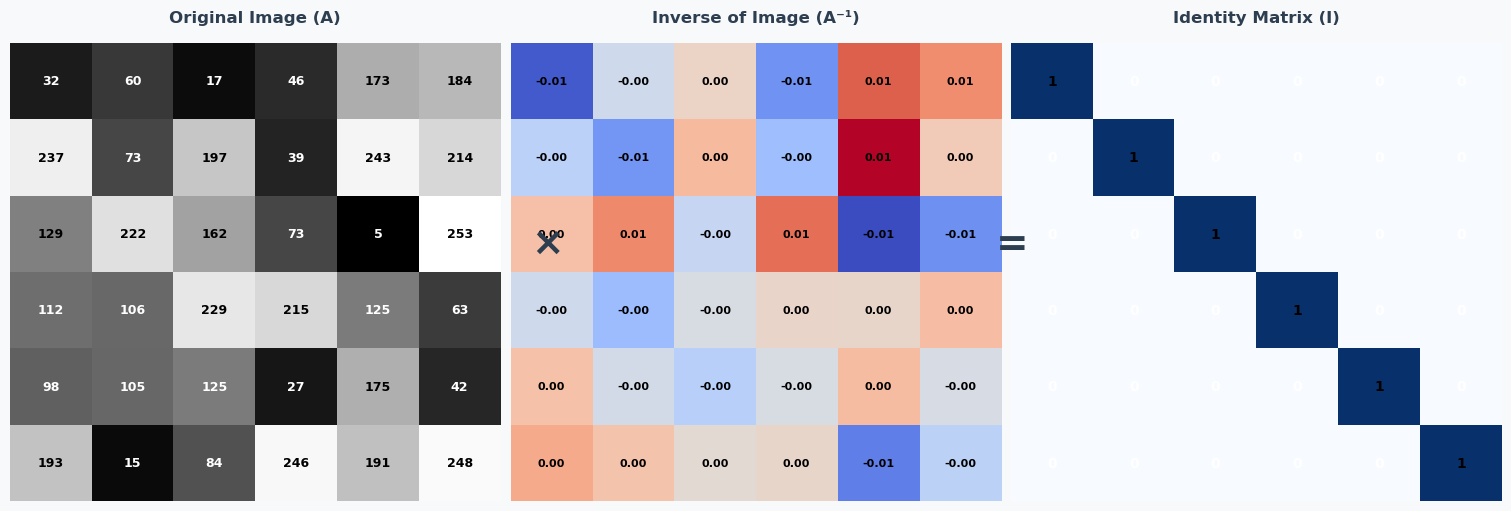

Type 'r' to Restart Demo, or Press Enter to Exit:  


Exiting Dashboard.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML

class UltimateDashboard:
    def __init__(self):
        self.image_size = 6
        self.original = None
        self.operator = None
        self.enhanced = None
        self.recovered = None
        self.inverse_op = None
        
        # Internal styling for the "Dashboard" look
        self.style = """
        <style>
            .dash-box { border: 2px solid #2c3e50; border-radius: 8px; padding: 20px; background-color: #f8f9fa; font-family: 'Segoe UI', sans-serif; }
            .dash-header { color: #2c3e50; border-bottom: 3px solid #3498db; padding-bottom: 10px; margin-bottom: 15px; }
            .dash-text { font-size: 15px; line-height: 1.6; color: #2c3e50; }
            .dash-note { background-color: #e8f6f3; border-left: 5px solid #1abc9c; padding: 10px; margin: 10px 0; }
        </style>
        """

    def render_slide(self, title, content_html):
        clear_output(wait=True)
        html_code = f"""
        {self.style}
        <div class="dash-box">
            <h2 class="dash-header">{title}</h2>
            <div class="dash-text">{content_html}</div>
        </div>
        """
        display(HTML(html_code))

    def get_matrix_input(self, name):
        """Interactive console input designed for the dashboard."""
        print(f"\n👉 CONFIGURATION: {name}")
        print("   [1] Randomly Generate (Recommended)")
        print("   [2] Manual Input")
        
        while True:
            choice = input("   Select Option (1 or 2) > ").strip()
            if choice == '1':
                # Ensure we generate a non-singular matrix for the image too
                # so the final bonus step (Identity check) works perfectly.
                while True:
                    if "Image" in name:
                        mat = np.random.randint(0, 256, (6, 6))
                    else:
                        mat = np.random.randint(0, 3, (6, 6)) + np.eye(6)*2
                    
                    if abs(np.linalg.det(mat)) > 1e-5: # Ensure invertible
                        return mat
            elif choice == '2':
                print(f"   Enter 36 integers for {name} (space separated):")
                try:
                    vals = list(map(float, input("   Values > ").strip().split()))
                    if len(vals) != 36: raise ValueError
                    return np.array(vals).reshape(6,6)
                except:
                    print("   ❌ Invalid Input. Please try again.")
            else:
                print("   ❌ Please type 1 or 2.")

    def plot_matrices(self, matrices, titles, signs):
        """Visualizes matrices with smart number formatting."""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
        fig.patch.set_facecolor('#f8f9fa') 
        
        for i, (ax, mat, title) in enumerate(zip(axes, matrices, titles)):
            # Determine color map
            is_inverse = 'Inverse' in title
            is_identity = 'Identity' in title
            
            cmap = 'coolwarm' if (is_inverse or i==1) and not is_identity else 'gray'
            if is_identity: cmap = 'Blues'
            
            im = ax.imshow(mat, cmap=cmap, aspect='auto')
            ax.set_title(title, fontsize=12, fontweight='bold', color='#2c3e50', pad=15)
            ax.axis('off')
            
            # Draw Grid
            ax.set_xticks(np.arange(-.5, 6, 1), minor=True)
            ax.set_yticks(np.arange(-.5, 6, 1), minor=True)
            ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
            
            # Annotate numbers
            min_v, max_v = mat.min(), mat.max()
            for r in range(6):
                for c in range(6):
                    val = mat[r, c]
                    
                    # SMART FORMATTING LOGIC
                    # If it's an Inverse matrix, show decimals. 
                    # If it's Image or Identity, show Integers.
                    if is_inverse and not is_identity:
                        txt = f"{val:.2f}" # Show decimals for precision
                        font_s = 8
                    elif is_identity:
                        txt = f"{int(round(val))}"
                        font_s = 10
                    else:
                        txt = f"{int(val)}"
                        font_s = 9

                    # Text Color Logic
                    threshold = min_v + (max_v-min_v)/2
                    color = 'white' if val < threshold else 'black'
                    if cmap == 'coolwarm': color = 'black' # Force black on colored maps for readability
                    
                    ax.text(c, r, txt, ha='center', va='center', color=color, fontsize=font_s, fontweight='bold')

        # Add signs (x and =)
        plt.figtext(0.35, 0.5, signs[0], fontsize=28, weight='bold', color='#2c3e50')
        plt.figtext(0.66, 0.5, signs[1], fontsize=28, weight='bold', color='#2c3e50')
        plt.show()

    def run(self):
        while True:
            # ================= SLIDE 1: INIT =================
            self.render_slide("Step 1: Dashboard Initialization", """
                <p><b>Welcome to the Interactive Matrix Lab.</b></p>
                <p>Please configure your inputs below (Check the console):</p>
            """)
            
            self.original = self.get_matrix_input("Original Image")
            self.operator = self.get_matrix_input("Enhancement Operator")
            
            # Validation
            if abs(np.linalg.det(self.operator)) < 1e-5:
                print("\n❌ Operator is Singular. Restarting...")
                continue

            # Calculations
            self.enhanced = np.dot(self.operator, self.original)
            self.inverse_op = np.linalg.inv(self.operator)
            self.recovered = np.dot(self.inverse_op, self.enhanced)

            input("\n✅ Inputs Ready. Press Enter for Input Analysis >")

            # ================= SLIDE 2: ANALYSIS =================
            self.render_slide("Step 2: Input Analysis", """
                <p>We have successfully loaded:</p>
                <ul>
                    <li><b>Matrix A (Original):</b> Pixel Data</li>
                    <li><b>Matrix B (Operator):</b> Transformation Function</li>
                </ul>
                <div class='dash-note'>
                    We will now perform: <b>Enhanced = Operator × Original</b>
                </div>
            """)
            input("\nPress Enter to Visualize Transformation >")

            # ================= SLIDE 3: VISUALIZATION =================
            self.render_slide("Step 3: Applied Transformation", """
                <p>Multiplying the image by the operator transforms the data.</p>
                <p>The image is now 'scrambled' or 'enhanced'.</p>
            """)
            
            self.plot_matrices(
                [self.original, self.operator, self.enhanced],
                ["Original (A)", "Operator (B)", "Enhanced (C)"],
                ["×", "="]
            )
            
            input("\nPress Enter for Recovery Logic >")

            # ================= SLIDE 4: RECOVERY CONCEPT =================
            self.render_slide("Step 4: The Recovery Concept", """
                <p>To undo the transformation, we need the <b>Inverse Matrix</b>.</p>
                <p>Just like dividing by 5 undoes multiplying by 5, multiplying by the Inverse Matrix ($B^{-1}$) undoes the Operator ($B$).</p>
                <p><b>Key Formula:</b> $B^{-1} \\times C = A$</p>
            """)
            input("\nPress Enter to Apply Inverse >")

            # ================= SLIDE 5: RECOVERY RESULT =================
            self.render_slide("Step 5: Recovery Complete", """
                <p>We multiplied the Enhanced Image by the Inverse Operator.</p>
                <p>Notice that the <b>Inverse Matrix</b> contains decimals (e.g., 0.25, -0.10). These precise values are needed to reverse the integer math perfectly.</p>
            """)
            
            self.plot_matrices(
                [self.enhanced, self.inverse_op, self.recovered],
                ["Enhanced (C)", "Inverse Op (B⁻¹)", "Recovered (A)"],
                ["×", "="]
            )
            
            input("\nPress Enter for the Final Verification (Identity Step) >")

            # ================= SLIDE 6: BONUS IDENTITY =================
            # Bonus Step Logic
            inv_original = np.linalg.inv(self.original)
            identity_result = np.dot(self.original, inv_original) # Should be Identity

            self.render_slide("Step 6: Identity Matrix Verification", """
                <p><b>Final Concept Check:</b></p>
                <p>In Linear Algebra, any invertible matrix multiplied by its own inverse yields the <b>Identity Matrix (I)</b>.</p>
                <p>Let's prove this using your <b>Original Image Matrix</b>:</p>
                <div class='dash-note' style='text-align:center'>
                    Original Image × Inverse of Original = Identity Matrix
                </div>
                <p>The result on the far right will be a diagonal of <b>1s</b> with <b>0s</b> everywhere else.</p>
            """)

            self.plot_matrices(
                [self.original, inv_original, identity_result],
                ["Original Image (A)", "Inverse of Image (A⁻¹)", "Identity Matrix (I)"],
                ["×", "="]
            )

            # Loop
            print("\n" + "="*60)
            q = input("Type 'r' to Restart Demo, or Press Enter to Exit: ").strip().lower()
            if q != 'r':
                print("Exiting Dashboard.")
                break

if __name__ == "__main__":
    app = UltimateDashboard()
    app.run()